In [100]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [101]:
# Import Required Libraries
import numpy as np
import pandas as pd
import pickle as pkl
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read and Inspect DTI Dataset

In [102]:
# dti = pd.read_csv("merged-dti-data.csv")
dti = pd.read_csv('../../data_v2/merged-dti-data_v2.csv')
dti.head()

,city_municipality,2018 - Local Economy Size,2018 - Local Economy Growth,2018 - Active Establishments in the Locality,2018 - Safety Compliant Business,2018 - Employment Generation,2018 - Cost of Living,2018 - Cost of Doing Business,2018 - Financial Deepening,2018 - Productivity,2018 - Presence of Business and Professional Organizations,2018 - Compliance to National Directives,2018 - Presence of Investment Promotion Unit,2018 - Compliance to ARTA Citizens Charter,2018 - Capacity to Generate Local Resource,2018 - Capacity of Health Services,2018 - Capacity of School Services,2018 - Recognition of Performance,2018 - Getting Business Permits,2018 - Peace and Order,2018 - Social Protection,2018 - Road Network,2018 - Distance to Ports,2018 - Availability of Basic Utilities,2018 - Transportation Vehicles,2018 - Education,2018 - Health,2018 - LGU Investment,2018 - Accommodation Capacity,2018 - Information Technology Capacity,2018 - Financial Technology Capacity,2018 - Land Use Plan,2018 - Disaster Risk Reduction Plan,2018 - Annual Disaster Drill,2018 - Early Warning System,2018 - Budget for DRRMP,2018 - Local Risk Assessments,2018 - Emergency Infrastructure,2018 - Utilities,2018 - Employed Population,2018 - Sanitary System,2019 - Local Economy Size,2019 - Local Economy Growth,2019 - Active Establishments in the Locality,2019 - Safety Compliant Business,2019 - Employment Generation,2019 - Cost of Living,2019 - Cost of Doing Business,2019 - Financial Deepening,2019 - Productivity,2019 - Presence of Business and Professional Organizations,2019 - Compliance to National Directives,2019 - Presence of Investment Promotion Unit,2019 - Compliance to ARTA Citizens Charter,2019 - Capacity to Generate Local Resource,2019 - Capacity of Health Services,2019 - Capacity of School Services,2019 - Recognition of Performance,2019 - Getting Business Permits,2019 - Peace and Order,2019 - Social Protection,2019 - Road Network,2019 - Distance to Ports,2019 - Availability of Basic Utilities,2019 - Transportation Vehicles,2019 - Education,2019 - Health,2019 - LGU Investment,2019 - Accommodation Capacity,2019 - Information Technology Capacity,2019 - Financial Technology Capacity,2019 - Land Use Plan,2019 - Disaster Risk Reduction Plan,2019 - Annual Disaster Drill,2019 - Early Warning System,2019 - Budget for DRRMP,2019 - Local Risk Assessments,2019 - Emergency Infrastructure,2019 - Utilities,2019 - Employed Population,2019 - Sanitary System,2020 - Local Economy Size,2020 - Local Economy Growth,2020 - Active Establishments in the Locality,2020 - Safety Compliant Business,2020 - Employment Generation,2020 - Cost of Living,2020 - Cost of Doing Business,2020 - Financial Deepening,2020 - Productivity,2020 - Presence of Business and Professional Organizations,2020 - Compliance to National Directives,2020 - Presence of Investment Promotion Unit,2020 - Compliance to ARTA Citizens Charter,2020 - Capacity to Generate Local Resource,2020 - Capacity of Health Services,2020 - Capacity of School Services,2020 - Recognition of Performance,2020 - Getting Business Permits,2020 - Peace and Order,2020 - Social Protection,2020 - Road Network,2020 - Distance to Ports,2020 - Availability of Basic Utilities,2020 - Transportation Vehicles,2020 - Education,2020 - Health,2020 - LGU Investment,2020 - Accommodation Capacity,2020 - Information Technology Capacity,2020 - Financial Technology Capacity,2020 - Land Use Plan,2020 - Disaster Risk Reduction Plan,2020 - Annual Disaster Drill,2020 - Early Warning System,2020 - Budget for DRRMP,2020 - Local Risk Assessments,2020 - Emergency Infrastructure,2020 - Utilities,2020 - Employed Population,2020 - Sanitary System,2021 - Local Economy Size,2021 - Local Economy Growth,2021 - Active Establishments in the Locality,2021 - Safety Compliant Business,2021 - Employment Generation,2021 - Cost of Living,2021 - Cost of Doing Business,2021 - Financial Deepening,2021 - Productivity,2021 - Presence of Business and Professional Organizations,2021 - Complia

In [103]:
# Setting the index as city_municipality
dti = pd.DataFrame(dti).set_index('city_municipality')

In [104]:
# Finding the rows that has 100% null values
dti[dti.isna().all(axis=1)]

,2018 - Local Economy Size,2018 - Local Economy Growth,2018 - Active Establishments in the Locality,2018 - Safety Compliant Business,2018 - Employment Generation,2018 - Cost of Living,2018 - Cost of Doing Business,2018 - Financial Deepening,2018 - Productivity,2018 - Presence of Business and Professional Organizations,2018 - Compliance to National Directives,2018 - Presence of Investment Promotion Unit,2018 - Compliance to ARTA Citizens Charter,2018 - Capacity to Generate Local Resource,2018 - Capacity of Health Services,2018 - Capacity of School Services,2018 - Recognition of Performance,2018 - Getting Business Permits,2018 - Peace and Order,2018 - Social Protection,2018 - Road Network,2018 - Distance to Ports,2018 - Availability of Basic Utilities,2018 - Transportation Vehicles,2018 - Education,2018 - Health,2018 - LGU Investment,2018 - Accommodation Capacity,2018 - Information Technology Capacity,2018 - Financial Technology Capacity,2018 - Land Use Plan,2018 - Disaster Risk Reduction Plan,2018 - Annual Disaster Drill,2018 - Early Warning System,2018 - Budget for DRRMP,2018 - Local Risk Assessments,2018 - Emergency Infrastructure,2018 - Utilities,2018 - Employed Population,2018 - Sanitary System,2019 - Local Economy Size,2019 - Local Economy Growth,2019 - Active Establishments in the Locality,2019 - Safety Compliant Business,2019 - Employment Generation,2019 - Cost of Living,2019 - Cost of Doing Business,2019 - Financial Deepening,2019 - Productivity,2019 - Presence of Business and Professional Organizations,2019 - Compliance to National Directives,2019 - Presence of Investment Promotion Unit,2019 - Compliance to ARTA Citizens Charter,2019 - Capacity to Generate Local Resource,2019 - Capacity of Health Services,2019 - Capacity of School Services,2019 - Recognition of Performance,2019 - Getting Business Permits,2019 - Peace and Order,2019 - Social Protection,2019 - Road Network,2019 - Distance to Ports,2019 - Availability of Basic Utilities,2019 - Transportation Vehicles,2019 - Education,2019 - Health,2019 - LGU Investment,2019 - Accommodation Capacity,2019 - Information Technology Capacity,2019 - Financial Technology Capacity,2019 - Land Use Plan,2019 - Disaster Risk Reduction Plan,2019 - Annual Disaster Drill,2019 - Early Warning System,2019 - Budget for DRRMP,2019 - Local Risk Assessments,2019 - Emergency Infrastructure,2019 - Utilities,2019 - Employed Population,2019 - Sanitary System,2020 - Local Economy Size,2020 - Local Economy Growth,2020 - Active Establishments in the Locality,2020 - Safety Compliant Business,2020 - Employment Generation,2020 - Cost of Living,2020 - Cost of Doing Business,2020 - Financial Deepening,2020 - Productivity,2020 - Presence of Business and Professional Organizations,2020 - Compliance to National Directives,2020 - Presence of Investment Promotion Unit,2020 - Compliance to ARTA Citizens Charter,2020 - Capacity to Generate Local Resource,2020 - Capacity of Health Services,2020 - Capacity of School Services,2020 - Recognition of Performance,2020 - Getting Business Permits,2020 - Peace and Order,2020 - Social Protection,2020 - Road Network,2020 - Distance to Ports,2020 - Availability of Basic Utilities,2020 - Transportation Vehicles,2020 - Education,2020 - Health,2020 - LGU Investment,2020 - Accommodation Capacity,2020 - Information Technology Capacity,2020 - Financial Technology Capacity,2020 - Land Use Plan,2020 - Disaster Risk Reduction Plan,2020 - Annual Disaster Drill,2020 - Early Warning System,2020 - Budget for DRRMP,2020 - Local Risk Assessments,2020 - Emergency Infrastructure,2020 - Utilities,2020 - Employed Population,2020 - Sanitary System,2021 - Local Economy Size,2021 - Local Economy Growth,2021 - Active Establishments in the Locality,2021 - Safety Compliant Business,2021 - Employment Generation,2021 - Cost of Living,2021 - Cost of Doing Business,2021 - Financial Deepening,2021 - Productivity,2021 - Presence of Business and Professional Organizations,2021 - Compliance to National Di

No rows have 100% null values. So we can try backfilling and frontfilling for any missing values by extraploating values from recent years.

In [105]:
#Creating a dataframe with only 2022 data
cols_2022 = dti.columns[dti.columns.str.startswith('2022')].tolist()
dti_2022 = dti[cols_2022]
dti_2022.head()

,2022 - Local Economy Size,2022 - Local Economy Growth,2022 - Active Establishments in the Locality,2022 - Safety Compliant Business,2022 - Employment Generation,2022 - Cost of Living,2022 - Cost of Doing Business,2022 - Financial Deepening,2022 - Productivity,2022 - Presence of Business and Professional Organizations,2022 - Compliance to National Directives,2022 - Presence of Investment Promotion Unit,2022 - Compliance to ARTA Citizens Charter,2022 - Capacity to Generate Local Resource,2022 - Capacity of Health Services,2022 - Capacity of School Services,2022 - Recognition of Performance,2022 - Getting Business Permits,2022 - Peace and Order,2022 - Social Protection,2022 - Road Network,2022 - Distance to Ports,2022 - Availability of Basic Utilities,2022 - Transportation Vehicles,2022 - Education,2022 - Health,2022 - LGU Investment,2022 - Accommodation Capacity,2022 - Information Technology Capacity,2022 - Financial Technology Capacity,2022 - Land Use Plan,2022 - Disaster Risk Reduction Plan,2022 - Annual Disaster Drill,2022 - Early Warning System,2022 - Budget for DRRMP,2022 - Local Risk Assessments,2022 - Emergency Infrastructure,2022 - Utilities,2022 - Employed Population,2022 - Sanitary System,2022 - Start Up and Innovation Facilities,2022 - Innovation Financing: R&D Expenditures Allotment,2022 - STEM graduates,2022 - Intellectual Property Registration,2022 - ICT Use: E-BPLS Software,2022 - Internet Capability,2022 - Availability of Basic Internet Service,2022 - Online Payment Facilities,2022 - ICT Plan,2022 - New Technology
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.0105,0.0001,0.0662,0.0000,0.0624,1.9279,1.9004,0.0793,0.0341,0.0117,1.8214,1.6667,2.0,0.0028,0.0019,0.0022,0.0000,1.5,0.0644,0.0014,0.0001,1.8963,0.0945,0.0032,0.0749,0.0978,0.0012,0.0000,0.0176,0.0172,1.9848,1.9998,1.002,1.0087,0.0,2.0,0.0292,1.5007,0.0061,1.0002,0.1281,0.0000,0.0195,0.0221,2.0,0.0095,0.0000,0.0,2.0001,0.0
Abra De Ilog,0.0015,0.0000,0.0498,0.0000,0.0171,1.6875,1.8990,0.0443,0.0042,0.0050,1.9643,0.0000,0.0,0.0012,0.0005,0.0018,0.0291,2.0,0.0001,0.0004,0.0001,1.7350,0.0035,0.0322,0.0087,0.0245,0.0004,0.0000,0.0176,0.0000,1.9848,1.9998,1.008,1.0124,0.0,1.0,0.4186,1.5011,0.0632,1.5002,0.0000,0.0000,0.0000,0.0009,2.0,0.0095,0.0000,0.0,0.0000,0.0
Abucay,0.0144,0.0007,0.7920,0.4603,0.8238,1.9990,1.8962,0.2252,0.3706,0.0095,1.8077,1.9997,1.0,0.2974,0.4707,0.0598,0.2537,1.5,0.0015,0.9985,0.0011,1.9823,0.4548,0.0229,0.1527,0.2382,0.0010,0.0246,0.3913,0.0909,1.9595,1.9998,1.002,1.0375,0.0,2.0,0.4144,1.5093,0.0563,1.5000,0.0533,0.0038,0.0047,0.0483,2.0,0.1957,0.1194,0.0,2.0001,0.0
Abulug,0.0144,0.0010,0.3012,0.2501,0.4434,1.9989,1.8972,0.4652,0.2666,0.0000,0.9231,0.0000,2.0,0.0993,0.1017,0.0119,0.0500,0.5,0.0002,0.0026,0.0017,1.8904,0.3911,0.0071,0.0835,0.2296,0.0001,0.0518,0.2174,0.2727,1.9865,0.4993,1.002,1.0040,0.0,2.0,0.5214,1.5000,0.0041,1.5000,0.0267,0.0000,0.0023,0.0000,0.0,0.1087,0.0000,0.0,0.6667,0.0
Abuyog,0.0058,0.0000,0.1413,0.0000,0.0551,1.7596,1.8405,0.2431,0.0386,0.0061,1.8571,1.9744,2.0,0.0026,0.0019,0.0758,0.0000,2.0,0.0000,0.0000,0.0020,1.9130,0.0040,0.0255,0.1161,0.3853,0.0009,0.0000,0.0881,0.0431,1.9242,1.9998,0.000,1.0025,0.0,2.0,0.4103,1.5039,0.0310,1.5002,0.0000,0.0000,0.0522,0.0000,2.0,1.0476,0.0037,0.0,1.3334,0.0


In [106]:
# Remove last 10 columns which are not availble for other years
dti_2022 = dti_2022.iloc[:,0:40]
dti_2022.shape

(1632, 40)

In [107]:
# Remove '2022 - ' from all the column names
dti_2022.columns = dti_2022.columns.str.replace('2022 - ','')
dti_2022.head()

,Local Economy Size,Local Economy Growth,Active Establishments in the Locality,Safety Compliant Business,Employment Generation,Cost of Living,Cost of Doing Business,Financial Deepening,Productivity,Presence of Business and Professional Organizations,Compliance to National Directives,Presence of Investment Promotion Unit,Compliance to ARTA Citizens Charter,Capacity to Generate Local Resource,Capacity of Health Services,Capacity of School Services,Recognition of Performance,Getting Business Permits,Peace and Order,Social Protection,Road Network,Distance to Ports,Availability of Basic Utilities,Transportation Vehicles,Education,Health,LGU Investment,Accommodation Capacity,Information Technology Capacity,Financial Technology Capacity,Land Use Plan,Disaster Risk Reduction Plan,Annual Disaster Drill,Early Warning System,Budget for DRRMP,Local Risk Assessments,Emergency Infrastructure,Utilities,Employed Population,Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.0105,0.0001,0.0662,0.0000,0.0624,1.9279,1.9004,0.0793,0.0341,0.0117,1.8214,1.6667,2.0,0.0028,0.0019,0.0022,0.0000,1.5,0.0644,0.0014,0.0001,1.8963,0.0945,0.0032,0.0749,0.0978,0.0012,0.0000,0.0176,0.0172,1.9848,1.9998,1.002,1.0087,0.0,2.0,0.0292,1.5007,0.0061,1.0002
Abra De Ilog,0.0015,0.0000,0.0498,0.0000,0.0171,1.6875,1.8990,0.0443,0.0042,0.0050,1.9643,0.0000,0.0,0.0012,0.0005,0.0018,0.0291,2.0,0.0001,0.0004,0.0001,1.7350,0.0035,0.0322,0.0087,0.0245,0.0004,0.0000,0.0176,0.0000,1.9848,1.9998,1.008,1.0124,0.0,1.0,0.4186,1.5011,0.0632,1.5002
Abucay,0.0144,0.0007,0.7920,0.4603,0.8238,1.9990,1.8962,0.2252,0.3706,0.0095,1.8077,1.9997,1.0,0.2974,0.4707,0.0598,0.2537,1.5,0.0015,0.9985,0.0011,1.9823,0.4548,0.0229,0.1527,0.2382,0.0010,0.0246,0.3913,0.0909,1.9595,1.9998,1.002,1.0375,0.0,2.0,0.4144,1.5093,0.0563,1.5000
Abulug,0.0144,0.0010,0.3012,0.2501,0.4434,1.9989,1.8972,0.4652,0.2666,0.0000,0.9231,0.0000,2.0,0.0993,0.1017,0.0119,0.0500,0.5,0.0002,0.0026,0.0017,1.8904,0.3911,0.0071,0.0835,0.2296,0.0001,0.0518,0.2174,0.2727,1.9865,0.4993,1.002,1.0040,0.0,2.0,0.5214,1.5000,0.0041,1.5000
Abuyog,0.0058,0.0000,0.1413,0.0000,0.0551,1.7596,1.8405,0.2431,0.0386,0.0061,1.8571,1.9744,2.0,0.0026,0.0019,0.0758,0.0000,2.0,0.0000,0.0000,0.0020,1.9130,0.0040,0.0255,0.1161,0.3853,0.0009,0.0000,0.0881,0.0431,1.9242,1.9998,0.000,1.0025,0.0,2.0,0.4103,1.5039,0.0310,1.5002


In [108]:
# Finding the rows that has 100% null values in dti_2022
dti_2022[dti_2022.isna().all(axis=1)]

,Local Economy Size,Local Economy Growth,Active Establishments in the Locality,Safety Compliant Business,Employment Generation,Cost of Living,Cost of Doing Business,Financial Deepening,Productivity,Presence of Business and Professional Organizations,Compliance to National Directives,Presence of Investment Promotion Unit,Compliance to ARTA Citizens Charter,Capacity to Generate Local Resource,Capacity of Health Services,Capacity of School Services,Recognition of Performance,Getting Business Permits,Peace and Order,Social Protection,Road Network,Distance to Ports,Availability of Basic Utilities,Transportation Vehicles,Education,Health,LGU Investment,Accommodation Capacity,Information Technology Capacity,Financial Technology Capacity,Land Use Plan,Disaster Risk Reduction Plan,Annual Disaster Drill,Early Warning System,Budget for DRRMP,Local Risk Assessments,Emergency Infrastructure,Utilities,Employed Population,Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Magdiwang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
San Pascual (MS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Only 3 rows have 100% null values in dti_2022 dataframe. We will impute those values later.

In [109]:
#Creating a dataframe with only 2021 data
cols_2021 = dti.columns[dti.columns.str.startswith('2021')].tolist()
dti_2021 = dti[cols_2021]
dti_2021.head()

,2021 - Local Economy Size,2021 - Local Economy Growth,2021 - Active Establishments in the Locality,2021 - Safety Compliant Business,2021 - Employment Generation,2021 - Cost of Living,2021 - Cost of Doing Business,2021 - Financial Deepening,2021 - Productivity,2021 - Presence of Business and Professional Organizations,2021 - Compliance to National Directives,2021 - Presence of Investment Promotion Unit,2021 - Compliance to ARTA Citizens Charter,2021 - Capacity to Generate Local Resource,2021 - Capacity of Health Services,2021 - Capacity of School Services,2021 - Recognition of Performance,2021 - Getting Business Permits,2021 - Peace and Order,2021 - Social Protection,2021 - Road Network,2021 - Distance to Ports,2021 - Availability of Basic Utilities,2021 - Transportation Vehicles,2021 - Education,2021 - Health,2021 - LGU Investment,2021 - Accommodation Capacity,2021 - Information Technology Capacity,2021 - Financial Technology Capacity,2021 - Land Use Plan,2021 - Disaster Risk Reduction Plan,2021 - Annual Disaster Drill,2021 - Early Warning System,2021 - Budget for DRRMP,2021 - Local Risk Assessments,2021 - Emergency Infrastructure,2021 - Utilities,2021 - Employed Population,2021 - Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.0067,0.0045,0.2606,0.1683,0.1052,1.6250,2.3654,0.1231,0.0690,0.1089,2.2619,1.875,2.1365,0.0061,0.1064,0.0145,0.0,1.8169,0.0283,0.1047,0.1846,2.3721,2.2948,0.0030,0.0835,0.0816,0.0220,0.0000,0.0909,0.0436,2.4545,2.4737,1.2542,1.2537,0.0215,2.5,0.0531,1.2478,0.0060,1.2502
Abra De Ilog,0.0070,0.0066,0.0588,0.0676,0.0191,0.5938,2.3642,0.0380,0.0150,0.0106,2.4405,0.000,1.5440,0.0081,0.0691,0.0000,0.0,1.8247,0.0248,0.0000,0.1598,2.1703,2.0896,0.0790,0.0159,0.0533,0.0009,0.0072,0.0909,0.0000,2.4773,2.4737,1.2750,1.2683,0.0215,2.5,0.3294,1.2509,0.0443,1.8752
Abucay,0.0876,0.0007,0.7344,0.4760,0.5753,1.0625,2.0565,0.5657,0.5111,0.0030,2.3571,2.500,2.1777,0.1531,0.0903,0.0638,0.0,1.5521,0.0924,0.2760,0.0365,2.3120,2.4625,0.1896,0.0541,0.3211,0.1358,0.0033,0.3804,0.1389,2.4857,2.5000,1.2829,1.2799,0.0024,2.5,0.2674,1.3019,0.3219,1.8751
Abulug,0.0921,0.0012,0.3498,0.3568,0.3785,0.7813,2.1551,1.2830,0.3946,0.0030,1.1071,1.250,2.3359,0.0919,0.1278,0.1565,0.0,1.5472,0.1601,2.5000,0.0782,2.3418,2.1406,0.0527,0.0812,0.2431,0.1158,0.0519,0.9239,0.5655,2.5000,2.5000,1.2829,1.2525,0.0025,2.5,0.2912,1.2578,0.0157,1.8750
Abuyog,0.0111,0.0027,0.1457,0.1349,0.0811,1.9688,1.7724,0.5127,0.0606,0.0439,2.3214,2.500,2.2364,0.0045,0.1440,0.0922,0.0,2.0168,0.0413,0.4812,0.2456,2.3914,2.2411,0.0260,0.1394,0.4425,0.0232,0.0000,0.4091,0.1262,2.4091,2.4737,0.0000,1.2518,0.0236,2.5,0.2971,1.2604,0.0389,1.8753


In [110]:
# Finding the rows that has 100% null values
dti_2021[dti_2021.isna().all(axis=1)]

,2021 - Local Economy Size,2021 - Local Economy Growth,2021 - Active Establishments in the Locality,2021 - Safety Compliant Business,2021 - Employment Generation,2021 - Cost of Living,2021 - Cost of Doing Business,2021 - Financial Deepening,2021 - Productivity,2021 - Presence of Business and Professional Organizations,2021 - Compliance to National Directives,2021 - Presence of Investment Promotion Unit,2021 - Compliance to ARTA Citizens Charter,2021 - Capacity to Generate Local Resource,2021 - Capacity of Health Services,2021 - Capacity of School Services,2021 - Recognition of Performance,2021 - Getting Business Permits,2021 - Peace and Order,2021 - Social Protection,2021 - Road Network,2021 - Distance to Ports,2021 - Availability of Basic Utilities,2021 - Transportation Vehicles,2021 - Education,2021 - Health,2021 - LGU Investment,2021 - Accommodation Capacity,2021 - Information Technology Capacity,2021 - Financial Technology Capacity,2021 - Land Use Plan,2021 - Disaster Risk Reduction Plan,2021 - Annual Disaster Drill,2021 - Early Warning System,2021 - Budget for DRRMP,2021 - Local Risk Assessments,2021 - Emergency Infrastructure,2021 - Utilities,2021 - Employed Population,2021 - Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Akbar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Al-Barka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Compostela (DDO),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hadji Mohammad Ajul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hadji Muhtamad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kapai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lagayan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lugus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lumbaca-Unayan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
# Remove '2021 - ' from all the column names
dti_2021.columns = dti_2021.columns.str.replace('2021 - ','')
dti_2021.head()

,Local Economy Size,Local Economy Growth,Active Establishments in the Locality,Safety Compliant Business,Employment Generation,Cost of Living,Cost of Doing Business,Financial Deepening,Productivity,Presence of Business and Professional Organizations,Compliance to National Directives,Presence of Investment Promotion Unit,Compliance to ARTA Citizens Charter,Capacity to Generate Local Resource,Capacity of Health Services,Capacity of School Services,Recognition of Performance,Getting Business Permits,Peace and Order,Social Protection,Road Network,Distance to Ports,Availability of Basic Utilities,Transportation Vehicles,Education,Health,LGU Investment,Accommodation Capacity,Information Technology Capacity,Financial Technology Capacity,Land Use Plan,Disaster Risk Reduction Plan,Annual Disaster Drill,Early Warning System,Budget for DRRMP,Local Risk Assessments,Emergency Infrastructure,Utilities,Employed Population,Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.0067,0.0045,0.2606,0.1683,0.1052,1.6250,2.3654,0.1231,0.0690,0.1089,2.2619,1.875,2.1365,0.0061,0.1064,0.0145,0.0,1.8169,0.0283,0.1047,0.1846,2.3721,2.2948,0.0030,0.0835,0.0816,0.0220,0.0000,0.0909,0.0436,2.4545,2.4737,1.2542,1.2537,0.0215,2.5,0.0531,1.2478,0.0060,1.2502
Abra De Ilog,0.0070,0.0066,0.0588,0.0676,0.0191,0.5938,2.3642,0.0380,0.0150,0.0106,2.4405,0.000,1.5440,0.0081,0.0691,0.0000,0.0,1.8247,0.0248,0.0000,0.1598,2.1703,2.0896,0.0790,0.0159,0.0533,0.0009,0.0072,0.0909,0.0000,2.4773,2.4737,1.2750,1.2683,0.0215,2.5,0.3294,1.2509,0.0443,1.8752
Abucay,0.0876,0.0007,0.7344,0.4760,0.5753,1.0625,2.0565,0.5657,0.5111,0.0030,2.3571,2.500,2.1777,0.1531,0.0903,0.0638,0.0,1.5521,0.0924,0.2760,0.0365,2.3120,2.4625,0.1896,0.0541,0.3211,0.1358,0.0033,0.3804,0.1389,2.4857,2.5000,1.2829,1.2799,0.0024,2.5,0.2674,1.3019,0.3219,1.8751
Abulug,0.0921,0.0012,0.3498,0.3568,0.3785,0.7813,2.1551,1.2830,0.3946,0.0030,1.1071,1.250,2.3359,0.0919,0.1278,0.1565,0.0,1.5472,0.1601,2.5000,0.0782,2.3418,2.1406,0.0527,0.0812,0.2431,0.1158,0.0519,0.9239,0.5655,2.5000,2.5000,1.2829,1.2525,0.0025,2.5,0.2912,1.2578,0.0157,1.8750
Abuyog,0.0111,0.0027,0.1457,0.1349,0.0811,1.9688,1.7724,0.5127,0.0606,0.0439,2.3214,2.500,2.2364,0.0045,0.1440,0.0922,0.0,2.0168,0.0413,0.4812,0.2456,2.3914,2.2411,0.0260,0.1394,0.4425,0.0232,0.0000,0.4091,0.1262,2.4091,2.4737,0.0000,1.2518,0.0236,2.5,0.2971,1.2604,0.0389,1.8753


Only 27 rows have 100% null values. Let's impute those.

In [112]:
#Backfilling missing values in dti_2021 from dti_2022
dti_2021 = dti_2021.fillna(dti_2022)

In [113]:
# Finding the rows that has 100% null values
dti_2021[dti_2021.isna().all(axis=1)]

,Local Economy Size,Local Economy Growth,Active Establishments in the Locality,Safety Compliant Business,Employment Generation,Cost of Living,Cost of Doing Business,Financial Deepening,Productivity,Presence of Business and Professional Organizations,Compliance to National Directives,Presence of Investment Promotion Unit,Compliance to ARTA Citizens Charter,Capacity to Generate Local Resource,Capacity of Health Services,Capacity of School Services,Recognition of Performance,Getting Business Permits,Peace and Order,Social Protection,Road Network,Distance to Ports,Availability of Basic Utilities,Transportation Vehicles,Education,Health,LGU Investment,Accommodation Capacity,Information Technology Capacity,Financial Technology Capacity,Land Use Plan,Disaster Risk Reduction Plan,Annual Disaster Drill,Early Warning System,Budget for DRRMP,Local Risk Assessments,Emergency Infrastructure,Utilities,Employed Population,Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Oras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
#Creating a dataframe with only 2020 data
cols_2020 = dti.columns[dti.columns.str.startswith('2020')].tolist()
dti_2020 = dti[cols_2020]
dti_2020.head()

,2020 - Local Economy Size,2020 - Local Economy Growth,2020 - Active Establishments in the Locality,2020 - Safety Compliant Business,2020 - Employment Generation,2020 - Cost of Living,2020 - Cost of Doing Business,2020 - Financial Deepening,2020 - Productivity,2020 - Presence of Business and Professional Organizations,2020 - Compliance to National Directives,2020 - Presence of Investment Promotion Unit,2020 - Compliance to ARTA Citizens Charter,2020 - Capacity to Generate Local Resource,2020 - Capacity of Health Services,2020 - Capacity of School Services,2020 - Recognition of Performance,2020 - Getting Business Permits,2020 - Peace and Order,2020 - Social Protection,2020 - Road Network,2020 - Distance to Ports,2020 - Availability of Basic Utilities,2020 - Transportation Vehicles,2020 - Education,2020 - Health,2020 - LGU Investment,2020 - Accommodation Capacity,2020 - Information Technology Capacity,2020 - Financial Technology Capacity,2020 - Land Use Plan,2020 - Disaster Risk Reduction Plan,2020 - Annual Disaster Drill,2020 - Early Warning System,2020 - Budget for DRRMP,2020 - Local Risk Assessments,2020 - Emergency Infrastructure,2020 - Utilities,2020 - Employed Population,2020 - Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.0013,0.1419,0.1653,0.1643,0.0651,0.3017,2.2798,0.1390,0.0413,0.0216,2.4242,0.625,2.2404,0.0083,0.0587,0.0488,0.0023,2.3385,0.0072,0.0024,0.0006,2.4933,2.3125,0.0026,0.1185,0.0830,0.1665,0.0000,0.2679,0.0631,2.5000,2.5,2.5000,2.5,0.0852,2.5,0.5004,1.8706,0.0385,0.9946
Abra De Ilog,0.0368,0.3312,0.0368,0.0255,0.0166,0.0000,2.2618,0.0593,0.0088,0.0077,0.0000,0.000,2.2109,0.1211,0.0400,0.0536,0.0307,2.4826,0.0096,0.1610,0.0004,2.4844,2.1250,0.0703,0.0293,0.0330,0.1104,0.0000,0.2679,0.0481,2.3974,2.5,2.5000,2.5,0.1105,2.5,0.4665,1.8743,0.0798,1.9811
Abucay,0.1573,1.0283,0.5199,0.4827,0.4710,1.3542,2.0464,0.4358,0.3949,0.0031,2.4286,2.500,2.4561,0.4427,0.1018,0.0924,0.0000,1.5933,0.3444,0.8651,0.0006,2.2882,2.2125,0.0741,0.0465,0.3188,0.1252,0.0111,1.0046,0.2500,2.3718,2.5,2.5000,2.5,0.0579,2.5,0.4839,1.8880,0.3476,1.9886
Abulug,0.1152,1.0271,0.4901,0.4286,0.4318,1.4583,1.9800,1.0757,0.3447,0.0130,1.1786,1.250,2.4948,0.0881,0.1055,0.0803,0.0222,2.3572,0.3444,0.6289,0.8995,2.2845,1.8906,0.0389,0.0452,0.1691,0.0612,0.1236,0.2917,0.7500,1.3462,2.5,2.5000,2.5,0.0473,2.5,0.4934,1.8692,0.0367,1.5003
Abuyog,0.0056,0.3335,0.1439,0.1115,0.0697,0.7759,2.2232,0.5327,0.0510,0.0452,2.4621,2.500,2.4586,0.0382,0.0752,0.1681,0.0023,2.4909,0.0132,0.2410,0.0005,2.4986,2.2313,0.0484,0.1568,0.4584,0.2001,0.0000,0.3042,0.1262,2.4872,2.5,2.0833,2.5,0.1630,2.5,0.5320,1.8616,0.0061,1.9774


In [115]:
# Finding the rows that has 100% null values
dti_2020[dti_2020.isna().all(axis=1)]

,2020 - Local Economy Size,2020 - Local Economy Growth,2020 - Active Establishments in the Locality,2020 - Safety Compliant Business,2020 - Employment Generation,2020 - Cost of Living,2020 - Cost of Doing Business,2020 - Financial Deepening,2020 - Productivity,2020 - Presence of Business and Professional Organizations,2020 - Compliance to National Directives,2020 - Presence of Investment Promotion Unit,2020 - Compliance to ARTA Citizens Charter,2020 - Capacity to Generate Local Resource,2020 - Capacity of Health Services,2020 - Capacity of School Services,2020 - Recognition of Performance,2020 - Getting Business Permits,2020 - Peace and Order,2020 - Social Protection,2020 - Road Network,2020 - Distance to Ports,2020 - Availability of Basic Utilities,2020 - Transportation Vehicles,2020 - Education,2020 - Health,2020 - LGU Investment,2020 - Accommodation Capacity,2020 - Information Technology Capacity,2020 - Financial Technology Capacity,2020 - Land Use Plan,2020 - Disaster Risk Reduction Plan,2020 - Annual Disaster Drill,2020 - Early Warning System,2020 - Budget for DRRMP,2020 - Local Risk Assessments,2020 - Emergency Infrastructure,2020 - Utilities,2020 - Employed Population,2020 - Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Akbar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Al-Barka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amai Manabilang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ampatuan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bacolod-Kalawi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balabagan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balindong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barira,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bayang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
# Remove '2020 - ' from all the column names
dti_2020.columns = dti_2020.columns.str.replace('2020 - ','')
dti_2020.head()

,Local Economy Size,Local Economy Growth,Active Establishments in the Locality,Safety Compliant Business,Employment Generation,Cost of Living,Cost of Doing Business,Financial Deepening,Productivity,Presence of Business and Professional Organizations,Compliance to National Directives,Presence of Investment Promotion Unit,Compliance to ARTA Citizens Charter,Capacity to Generate Local Resource,Capacity of Health Services,Capacity of School Services,Recognition of Performance,Getting Business Permits,Peace and Order,Social Protection,Road Network,Distance to Ports,Availability of Basic Utilities,Transportation Vehicles,Education,Health,LGU Investment,Accommodation Capacity,Information Technology Capacity,Financial Technology Capacity,Land Use Plan,Disaster Risk Reduction Plan,Annual Disaster Drill,Early Warning System,Budget for DRRMP,Local Risk Assessments,Emergency Infrastructure,Utilities,Employed Population,Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.0013,0.1419,0.1653,0.1643,0.0651,0.3017,2.2798,0.1390,0.0413,0.0216,2.4242,0.625,2.2404,0.0083,0.0587,0.0488,0.0023,2.3385,0.0072,0.0024,0.0006,2.4933,2.3125,0.0026,0.1185,0.0830,0.1665,0.0000,0.2679,0.0631,2.5000,2.5,2.5000,2.5,0.0852,2.5,0.5004,1.8706,0.0385,0.9946
Abra De Ilog,0.0368,0.3312,0.0368,0.0255,0.0166,0.0000,2.2618,0.0593,0.0088,0.0077,0.0000,0.000,2.2109,0.1211,0.0400,0.0536,0.0307,2.4826,0.0096,0.1610,0.0004,2.4844,2.1250,0.0703,0.0293,0.0330,0.1104,0.0000,0.2679,0.0481,2.3974,2.5,2.5000,2.5,0.1105,2.5,0.4665,1.8743,0.0798,1.9811
Abucay,0.1573,1.0283,0.5199,0.4827,0.4710,1.3542,2.0464,0.4358,0.3949,0.0031,2.4286,2.500,2.4561,0.4427,0.1018,0.0924,0.0000,1.5933,0.3444,0.8651,0.0006,2.2882,2.2125,0.0741,0.0465,0.3188,0.1252,0.0111,1.0046,0.2500,2.3718,2.5,2.5000,2.5,0.0579,2.5,0.4839,1.8880,0.3476,1.9886
Abulug,0.1152,1.0271,0.4901,0.4286,0.4318,1.4583,1.9800,1.0757,0.3447,0.0130,1.1786,1.250,2.4948,0.0881,0.1055,0.0803,0.0222,2.3572,0.3444,0.6289,0.8995,2.2845,1.8906,0.0389,0.0452,0.1691,0.0612,0.1236,0.2917,0.7500,1.3462,2.5,2.5000,2.5,0.0473,2.5,0.4934,1.8692,0.0367,1.5003
Abuyog,0.0056,0.3335,0.1439,0.1115,0.0697,0.7759,2.2232,0.5327,0.0510,0.0452,2.4621,2.500,2.4586,0.0382,0.0752,0.1681,0.0023,2.4909,0.0132,0.2410,0.0005,2.4986,2.2313,0.0484,0.1568,0.4584,0.2001,0.0000,0.3042,0.1262,2.4872,2.5,2.0833,2.5,0.1630,2.5,0.5320,1.8616,0.0061,1.9774


In [117]:
#Backfilling missing values in dti_2020 from dti_2021
dti_2020 = dti_2020.fillna(dti_2021)

In [118]:
# Finding the rows that has 100% null values
dti_2020[dti_2020.isna().all(axis=1)]

,Local Economy Size,Local Economy Growth,Active Establishments in the Locality,Safety Compliant Business,Employment Generation,Cost of Living,Cost of Doing Business,Financial Deepening,Productivity,Presence of Business and Professional Organizations,Compliance to National Directives,Presence of Investment Promotion Unit,Compliance to ARTA Citizens Charter,Capacity to Generate Local Resource,Capacity of Health Services,Capacity of School Services,Recognition of Performance,Getting Business Permits,Peace and Order,Social Protection,Road Network,Distance to Ports,Availability of Basic Utilities,Transportation Vehicles,Education,Health,LGU Investment,Accommodation Capacity,Information Technology Capacity,Financial Technology Capacity,Land Use Plan,Disaster Risk Reduction Plan,Annual Disaster Drill,Early Warning System,Budget for DRRMP,Local Risk Assessments,Emergency Infrastructure,Utilities,Employed Population,Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [119]:
#Creating a dataframe with only 2019 data
cols_2019 = dti.columns[dti.columns.str.startswith('2019')].tolist()
dti_2019 = dti[cols_2019]
dti_2019.head()

,2019 - Local Economy Size,2019 - Local Economy Growth,2019 - Active Establishments in the Locality,2019 - Safety Compliant Business,2019 - Employment Generation,2019 - Cost of Living,2019 - Cost of Doing Business,2019 - Financial Deepening,2019 - Productivity,2019 - Presence of Business and Professional Organizations,2019 - Compliance to National Directives,2019 - Presence of Investment Promotion Unit,2019 - Compliance to ARTA Citizens Charter,2019 - Capacity to Generate Local Resource,2019 - Capacity of Health Services,2019 - Capacity of School Services,2019 - Recognition of Performance,2019 - Getting Business Permits,2019 - Peace and Order,2019 - Social Protection,2019 - Road Network,2019 - Distance to Ports,2019 - Availability of Basic Utilities,2019 - Transportation Vehicles,2019 - Education,2019 - Health,2019 - LGU Investment,2019 - Accommodation Capacity,2019 - Information Technology Capacity,2019 - Financial Technology Capacity,2019 - Land Use Plan,2019 - Disaster Risk Reduction Plan,2019 - Annual Disaster Drill,2019 - Early Warning System,2019 - Budget for DRRMP,2019 - Local Risk Assessments,2019 - Emergency Infrastructure,2019 - Utilities,2019 - Employed Population,2019 - Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.0051,0.0024,0.0000,0.2553,0.0000,0.9127,1.9655,0.1339,0.0004,0.0007,2.2000,2.5,1.9499,0.0074,0.0614,0.1451,0.0595,2.3451,0.0012,0.0007,0.1006,2.3204,2.1047,0.0029,0.1300,0.0689,0.3137,0.0000,0.0806,0.0671,2.4231,2.4537,2.2500,2.5,0.2189,2.5,0.4984,1.8558,0.0401,1.4921
Abra De Ilog,0.0025,0.0071,0.0267,0.0398,0.0181,1.8254,2.0960,0.0588,0.0002,0.0106,0.0000,0.0,1.9520,0.1330,0.0570,0.1210,0.0253,2.4832,0.0024,0.2415,0.0819,2.0490,2.0488,0.0564,0.0428,0.0603,0.2398,0.0000,0.1786,0.0000,2.3974,2.4537,2.2500,2.5,0.1545,2.5,0.4807,1.8746,0.0817,1.9674
Abucay,0.0659,0.0010,0.3854,0.4388,0.4713,2.5000,1.9681,0.3395,0.3674,0.0019,2.4988,2.5,2.3899,0.3186,0.0691,0.3244,0.0000,1.5288,0.2304,1.7256,0.0437,2.3654,2.4625,0.0483,0.1338,0.2526,0.1442,0.0055,0.6221,0.3125,2.3718,2.4537,2.4107,2.5,0.1544,2.5,0.4776,1.8850,0.2901,2.0447
Abulug,0.0417,0.0013,0.2087,0.3854,0.3250,1.7500,1.9673,0.7000,0.2565,0.0019,1.2481,2.5,2.2899,0.1402,0.1162,0.3944,0.4065,2.2940,0.2880,0.7120,0.1124,2.3365,1.9512,0.0185,0.1227,0.1214,0.0955,0.0516,0.2194,0.0543,0.3462,2.0833,1.2500,2.5,0.1396,2.5,0.5014,1.8742,0.0475,2.0125
Abuyog,0.0018,0.0008,0.1112,0.1251,0.0639,1.0714,2.1017,0.5411,0.0005,0.0177,2.4500,2.5,2.3974,0.0364,0.1034,0.3283,0.2119,2.4925,0.0072,0.0779,0.0484,2.3483,0.7668,0.0363,0.1710,0.3481,0.3554,0.0000,0.2387,0.1343,2.4872,2.4537,2.2500,2.5,0.2455,2.5,0.5121,1.8612,0.0095,1.9483


In [120]:
# Finding the rows that has 100% null values
dti_2019[dti_2019.isna().all(axis=1)]

,2019 - Local Economy Size,2019 - Local Economy Growth,2019 - Active Establishments in the Locality,2019 - Safety Compliant Business,2019 - Employment Generation,2019 - Cost of Living,2019 - Cost of Doing Business,2019 - Financial Deepening,2019 - Productivity,2019 - Presence of Business and Professional Organizations,2019 - Compliance to National Directives,2019 - Presence of Investment Promotion Unit,2019 - Compliance to ARTA Citizens Charter,2019 - Capacity to Generate Local Resource,2019 - Capacity of Health Services,2019 - Capacity of School Services,2019 - Recognition of Performance,2019 - Getting Business Permits,2019 - Peace and Order,2019 - Social Protection,2019 - Road Network,2019 - Distance to Ports,2019 - Availability of Basic Utilities,2019 - Transportation Vehicles,2019 - Education,2019 - Health,2019 - LGU Investment,2019 - Accommodation Capacity,2019 - Information Technology Capacity,2019 - Financial Technology Capacity,2019 - Land Use Plan,2019 - Disaster Risk Reduction Plan,2019 - Annual Disaster Drill,2019 - Early Warning System,2019 - Budget for DRRMP,2019 - Local Risk Assessments,2019 - Emergency Infrastructure,2019 - Utilities,2019 - Employed Population,2019 - Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Akbar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Al-Barka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amai Manabilang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ampatuan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bacolod-Kalawi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balabagan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balindong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barira,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bayang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
# Remove '2019 - ' from all the column names
dti_2019.columns = dti_2019.columns.str.replace('2019 - ','')
dti_2019.head()

,Local Economy Size,Local Economy Growth,Active Establishments in the Locality,Safety Compliant Business,Employment Generation,Cost of Living,Cost of Doing Business,Financial Deepening,Productivity,Presence of Business and Professional Organizations,Compliance to National Directives,Presence of Investment Promotion Unit,Compliance to ARTA Citizens Charter,Capacity to Generate Local Resource,Capacity of Health Services,Capacity of School Services,Recognition of Performance,Getting Business Permits,Peace and Order,Social Protection,Road Network,Distance to Ports,Availability of Basic Utilities,Transportation Vehicles,Education,Health,LGU Investment,Accommodation Capacity,Information Technology Capacity,Financial Technology Capacity,Land Use Plan,Disaster Risk Reduction Plan,Annual Disaster Drill,Early Warning System,Budget for DRRMP,Local Risk Assessments,Emergency Infrastructure,Utilities,Employed Population,Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.0051,0.0024,0.0000,0.2553,0.0000,0.9127,1.9655,0.1339,0.0004,0.0007,2.2000,2.5,1.9499,0.0074,0.0614,0.1451,0.0595,2.3451,0.0012,0.0007,0.1006,2.3204,2.1047,0.0029,0.1300,0.0689,0.3137,0.0000,0.0806,0.0671,2.4231,2.4537,2.2500,2.5,0.2189,2.5,0.4984,1.8558,0.0401,1.4921
Abra De Ilog,0.0025,0.0071,0.0267,0.0398,0.0181,1.8254,2.0960,0.0588,0.0002,0.0106,0.0000,0.0,1.9520,0.1330,0.0570,0.1210,0.0253,2.4832,0.0024,0.2415,0.0819,2.0490,2.0488,0.0564,0.0428,0.0603,0.2398,0.0000,0.1786,0.0000,2.3974,2.4537,2.2500,2.5,0.1545,2.5,0.4807,1.8746,0.0817,1.9674
Abucay,0.0659,0.0010,0.3854,0.4388,0.4713,2.5000,1.9681,0.3395,0.3674,0.0019,2.4988,2.5,2.3899,0.3186,0.0691,0.3244,0.0000,1.5288,0.2304,1.7256,0.0437,2.3654,2.4625,0.0483,0.1338,0.2526,0.1442,0.0055,0.6221,0.3125,2.3718,2.4537,2.4107,2.5,0.1544,2.5,0.4776,1.8850,0.2901,2.0447
Abulug,0.0417,0.0013,0.2087,0.3854,0.3250,1.7500,1.9673,0.7000,0.2565,0.0019,1.2481,2.5,2.2899,0.1402,0.1162,0.3944,0.4065,2.2940,0.2880,0.7120,0.1124,2.3365,1.9512,0.0185,0.1227,0.1214,0.0955,0.0516,0.2194,0.0543,0.3462,2.0833,1.2500,2.5,0.1396,2.5,0.5014,1.8742,0.0475,2.0125
Abuyog,0.0018,0.0008,0.1112,0.1251,0.0639,1.0714,2.1017,0.5411,0.0005,0.0177,2.4500,2.5,2.3974,0.0364,0.1034,0.3283,0.2119,2.4925,0.0072,0.0779,0.0484,2.3483,0.7668,0.0363,0.1710,0.3481,0.3554,0.0000,0.2387,0.1343,2.4872,2.4537,2.2500,2.5,0.2455,2.5,0.5121,1.8612,0.0095,1.9483


In [122]:
#Backfilling missing values in dti_2019 from dti_2020
dti_2019 = dti_2019.fillna(dti_2020)

In [123]:
# Finding the rows that has 100% null values
dti_2019[dti_2019.isna().all(axis=1)]

,Local Economy Size,Local Economy Growth,Active Establishments in the Locality,Safety Compliant Business,Employment Generation,Cost of Living,Cost of Doing Business,Financial Deepening,Productivity,Presence of Business and Professional Organizations,Compliance to National Directives,Presence of Investment Promotion Unit,Compliance to ARTA Citizens Charter,Capacity to Generate Local Resource,Capacity of Health Services,Capacity of School Services,Recognition of Performance,Getting Business Permits,Peace and Order,Social Protection,Road Network,Distance to Ports,Availability of Basic Utilities,Transportation Vehicles,Education,Health,LGU Investment,Accommodation Capacity,Information Technology Capacity,Financial Technology Capacity,Land Use Plan,Disaster Risk Reduction Plan,Annual Disaster Drill,Early Warning System,Budget for DRRMP,Local Risk Assessments,Emergency Infrastructure,Utilities,Employed Population,Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [124]:
#Creating a dataframe with only 2018 data
cols_2018 = dti.columns[dti.columns.str.startswith('2018')].tolist()
dti_2018 = dti[cols_2018]
dti_2018.head()

,2018 - Local Economy Size,2018 - Local Economy Growth,2018 - Active Establishments in the Locality,2018 - Safety Compliant Business,2018 - Employment Generation,2018 - Cost of Living,2018 - Cost of Doing Business,2018 - Financial Deepening,2018 - Productivity,2018 - Presence of Business and Professional Organizations,2018 - Compliance to National Directives,2018 - Presence of Investment Promotion Unit,2018 - Compliance to ARTA Citizens Charter,2018 - Capacity to Generate Local Resource,2018 - Capacity of Health Services,2018 - Capacity of School Services,2018 - Recognition of Performance,2018 - Getting Business Permits,2018 - Peace and Order,2018 - Social Protection,2018 - Road Network,2018 - Distance to Ports,2018 - Availability of Basic Utilities,2018 - Transportation Vehicles,2018 - Education,2018 - Health,2018 - LGU Investment,2018 - Accommodation Capacity,2018 - Information Technology Capacity,2018 - Financial Technology Capacity,2018 - Land Use Plan,2018 - Disaster Risk Reduction Plan,2018 - Annual Disaster Drill,2018 - Early Warning System,2018 - Budget for DRRMP,2018 - Local Risk Assessments,2018 - Emergency Infrastructure,2018 - Utilities,2018 - Employed Population,2018 - Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.0072,0.0224,0.2337,0.1253,0.0197,1.9907,2.1771,0.0423,0.0047,0.0218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abra De Ilog,0.0027,0.0102,0.0477,0.0282,0.0008,2.3611,2.2200,0.0184,0.0579,0.0235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abucay,0.0488,0.0020,0.0053,0.2363,0.2299,1.1111,1.8373,0.0965,0.0198,0.0317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abulug,0.0651,0.0052,0.0053,0.2440,0.1548,1.2963,2.0402,0.1762,0.0103,0.0011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abuyog,0.0115,0.0208,0.1813,0.3592,0.0499,1.0185,1.1430,0.1049,0.0028,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
# Finding the rows that has 100% null values
dti_2018[dti_2018.isna().all(axis=1)]

,2018 - Local Economy Size,2018 - Local Economy Growth,2018 - Active Establishments in the Locality,2018 - Safety Compliant Business,2018 - Employment Generation,2018 - Cost of Living,2018 - Cost of Doing Business,2018 - Financial Deepening,2018 - Productivity,2018 - Presence of Business and Professional Organizations,2018 - Compliance to National Directives,2018 - Presence of Investment Promotion Unit,2018 - Compliance to ARTA Citizens Charter,2018 - Capacity to Generate Local Resource,2018 - Capacity of Health Services,2018 - Capacity of School Services,2018 - Recognition of Performance,2018 - Getting Business Permits,2018 - Peace and Order,2018 - Social Protection,2018 - Road Network,2018 - Distance to Ports,2018 - Availability of Basic Utilities,2018 - Transportation Vehicles,2018 - Education,2018 - Health,2018 - LGU Investment,2018 - Accommodation Capacity,2018 - Information Technology Capacity,2018 - Financial Technology Capacity,2018 - Land Use Plan,2018 - Disaster Risk Reduction Plan,2018 - Annual Disaster Drill,2018 - Early Warning System,2018 - Budget for DRRMP,2018 - Local Risk Assessments,2018 - Emergency Infrastructure,2018 - Utilities,2018 - Employed Population,2018 - Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Akbar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Al-Barka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amai Manabilang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ampatuan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bacolod-Kalawi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balabagan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balindong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Baras (CT),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
# Remove '2018 - ' from all the column names
dti_2018.columns = dti_2018.columns.str.replace('2018 - ','')
dti_2018.head()

,Local Economy Size,Local Economy Growth,Active Establishments in the Locality,Safety Compliant Business,Employment Generation,Cost of Living,Cost of Doing Business,Financial Deepening,Productivity,Presence of Business and Professional Organizations,Compliance to National Directives,Presence of Investment Promotion Unit,Compliance to ARTA Citizens Charter,Capacity to Generate Local Resource,Capacity of Health Services,Capacity of School Services,Recognition of Performance,Getting Business Permits,Peace and Order,Social Protection,Road Network,Distance to Ports,Availability of Basic Utilities,Transportation Vehicles,Education,Health,LGU Investment,Accommodation Capacity,Information Technology Capacity,Financial Technology Capacity,Land Use Plan,Disaster Risk Reduction Plan,Annual Disaster Drill,Early Warning System,Budget for DRRMP,Local Risk Assessments,Emergency Infrastructure,Utilities,Employed Population,Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.0072,0.0224,0.2337,0.1253,0.0197,1.9907,2.1771,0.0423,0.0047,0.0218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abra De Ilog,0.0027,0.0102,0.0477,0.0282,0.0008,2.3611,2.2200,0.0184,0.0579,0.0235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abucay,0.0488,0.0020,0.0053,0.2363,0.2299,1.1111,1.8373,0.0965,0.0198,0.0317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abulug,0.0651,0.0052,0.0053,0.2440,0.1548,1.2963,2.0402,0.1762,0.0103,0.0011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abuyog,0.0115,0.0208,0.1813,0.3592,0.0499,1.0185,1.1430,0.1049,0.0028,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
#Backfilling missing values in dti_2018 from dti_2019
dti_2018 = dti_2018.fillna(dti_2019)

In [128]:
# Finding the rows that has 100% null values
dti_2018[dti_2018.isna().all(axis=1)]

,Local Economy Size,Local Economy Growth,Active Establishments in the Locality,Safety Compliant Business,Employment Generation,Cost of Living,Cost of Doing Business,Financial Deepening,Productivity,Presence of Business and Professional Organizations,Compliance to National Directives,Presence of Investment Promotion Unit,Compliance to ARTA Citizens Charter,Capacity to Generate Local Resource,Capacity of Health Services,Capacity of School Services,Recognition of Performance,Getting Business Permits,Peace and Order,Social Protection,Road Network,Distance to Ports,Availability of Basic Utilities,Transportation Vehicles,Education,Health,LGU Investment,Accommodation Capacity,Information Technology Capacity,Financial Technology Capacity,Land Use Plan,Disaster Risk Reduction Plan,Annual Disaster Drill,Early Warning System,Budget for DRRMP,Local Risk Assessments,Emergency Infrastructure,Utilities,Employed Population,Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [129]:
# Check number of missing values in each column of dti_2018
dti_2018.isnull().sum()

Local Economy Size                                     0
Local Economy Growth                                   0
Active Establishments in the Locality                  0
Safety Compliant Business                              0
Employment Generation                                  0
Cost of Living                                         0
Cost of Doing Business                                 0
Financial Deepening                                    0
Productivity                                           0
Presence of Business and Professional Organizations    0
Compliance to National Directives                      0
Presence of Investment Promotion Unit                  0
Compliance to ARTA Citizens Charter                    0
Capacity to Generate Local Resource                    0
Capacity of Health Services                            0
Capacity of School Services                            0
Recognition of Performance                             0
Getting Business Permits       

In [130]:
# Check number of missing values in each column of dti_2019
dti_2019.isnull().sum()

Local Economy Size                                     0
Local Economy Growth                                   0
Active Establishments in the Locality                  0
Safety Compliant Business                              0
Employment Generation                                  0
Cost of Living                                         0
Cost of Doing Business                                 0
Financial Deepening                                    0
Productivity                                           0
Presence of Business and Professional Organizations    0
Compliance to National Directives                      0
Presence of Investment Promotion Unit                  0
Compliance to ARTA Citizens Charter                    0
Capacity to Generate Local Resource                    0
Capacity of Health Services                            0
Capacity of School Services                            0
Recognition of Performance                             0
Getting Business Permits       

In [131]:
# Check number of missing values in each column of dti_2020
dti_2020.isnull().sum()

Local Economy Size                                     0
Local Economy Growth                                   0
Active Establishments in the Locality                  0
Safety Compliant Business                              0
Employment Generation                                  0
Cost of Living                                         0
Cost of Doing Business                                 0
Financial Deepening                                    0
Productivity                                           0
Presence of Business and Professional Organizations    0
Compliance to National Directives                      0
Presence of Investment Promotion Unit                  0
Compliance to ARTA Citizens Charter                    0
Capacity to Generate Local Resource                    0
Capacity of Health Services                            0
Capacity of School Services                            0
Recognition of Performance                             0
Getting Business Permits       

In [132]:
# Check number of missing values in each column of dti_2021
dti_2021.isnull().sum()

Local Economy Size                                     1
Local Economy Growth                                   1
Active Establishments in the Locality                  1
Safety Compliant Business                              1
Employment Generation                                  1
Cost of Living                                         1
Cost of Doing Business                                 1
Financial Deepening                                    1
Productivity                                           1
Presence of Business and Professional Organizations    1
Compliance to National Directives                      1
Presence of Investment Promotion Unit                  1
Compliance to ARTA Citizens Charter                    1
Capacity to Generate Local Resource                    1
Capacity of Health Services                            1
Capacity of School Services                            1
Recognition of Performance                             1
Getting Business Permits       

In [133]:
#Impute the missing values of dti_2021 from dt_2020
dti_2021 = dti_2021.fillna(dti_2020)

In [134]:
dti_2021.isnull().sum()

Local Economy Size                                     0
Local Economy Growth                                   0
Active Establishments in the Locality                  0
Safety Compliant Business                              0
Employment Generation                                  0
Cost of Living                                         0
Cost of Doing Business                                 0
Financial Deepening                                    0
Productivity                                           0
Presence of Business and Professional Organizations    0
Compliance to National Directives                      0
Presence of Investment Promotion Unit                  0
Compliance to ARTA Citizens Charter                    0
Capacity to Generate Local Resource                    0
Capacity of Health Services                            0
Capacity of School Services                            0
Recognition of Performance                             0
Getting Business Permits       

In [135]:
# Check number of missing values in each column of dti_2022
dti_2022.isnull().sum()

Local Economy Size                                      3
Local Economy Growth                                    3
Active Establishments in the Locality                  14
Safety Compliant Business                               3
Employment Generation                                   3
Cost of Living                                          3
Cost of Doing Business                                  3
Financial Deepening                                     3
Productivity                                            3
Presence of Business and Professional Organizations     3
Compliance to National Directives                       3
Presence of Investment Promotion Unit                   3
Compliance to ARTA Citizens Charter                     3
Capacity to Generate Local Resource                     3
Capacity of Health Services                             3
Capacity of School Services                             3
Recognition of Performance                              3
Getting Busine

In [136]:
#Impute the missing values of dti_2022 from dt_2021
dti_2022 = dti_2022.fillna(dti_2021)

In [137]:
# Check number of missing values in each column of dti_2022
dti_2022.isnull().sum()

Local Economy Size                                     0
Local Economy Growth                                   0
Active Establishments in the Locality                  0
Safety Compliant Business                              0
Employment Generation                                  0
Cost of Living                                         0
Cost of Doing Business                                 0
Financial Deepening                                    0
Productivity                                           0
Presence of Business and Professional Organizations    0
Compliance to National Directives                      0
Presence of Investment Promotion Unit                  0
Compliance to ARTA Citizens Charter                    0
Capacity to Generate Local Resource                    0
Capacity of Health Services                            0
Capacity of School Services                            0
Recognition of Performance                             0
Getting Business Permits       

### We will create a new data frame of 2021 data to merge

In [138]:
dti_21_data = dti_2021.copy()
dti_21_data

,Local Economy Size,Local Economy Growth,Active Establishments in the Locality,Safety Compliant Business,Employment Generation,Cost of Living,Cost of Doing Business,Financial Deepening,Productivity,Presence of Business and Professional Organizations,Compliance to National Directives,Presence of Investment Promotion Unit,Compliance to ARTA Citizens Charter,Capacity to Generate Local Resource,Capacity of Health Services,Capacity of School Services,Recognition of Performance,Getting Business Permits,Peace and Order,Social Protection,Road Network,Distance to Ports,Availability of Basic Utilities,Transportation Vehicles,Education,Health,LGU Investment,Accommodation Capacity,Information Technology Capacity,Financial Technology Capacity,Land Use Plan,Disaster Risk Reduction Plan,Annual Disaster Drill,Early Warning System,Budget for DRRMP,Local Risk Assessments,Emergency Infrastructure,Utilities,Employed Population,Sanitary System
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.0067,0.0045,0.2606,0.1683,0.1052,1.6250,2.3654,0.1231,0.0690,0.1089,2.2619,1.875,2.1365,0.0061,0.1064,0.0145,0.0000,1.8169,0.0283,0.1047,0.1846,2.3721,2.2948,0.0030,0.0835,0.0816,0.0220,0.0000,0.0909,0.0436,2.4545,2.4737,1.2542,1.2537,0.0215,2.5,0.0531,1.2478,0.0060,1.2502
Abra De Ilog,0.0070,0.0066,0.0588,0.0676,0.0191,0.5938,2.3642,0.0380,0.0150,0.0106,2.4405,0.000,1.5440,0.0081,0.0691,0.0000,0.0000,1.8247,0.0248,0.0000,0.1598,2.1703,2.0896,0.0790,0.0159,0.0533,0.0009,0.0072,0.0909,0.0000,2.4773,2.4737,1.2750,1.2683,0.0215,2.5,0.3294,1.2509,0.0443,1.8752
Abucay,0.0876,0.0007,0.7344,0.4760,0.5753,1.0625,2.0565,0.5657,0.5111,0.0030,2.3571,2.500,2.1777,0.1531,0.0903,0.0638,0.0000,1.5521,0.0924,0.2760,0.0365,2.3120,2.4625,0.1896,0.0541,0.3211,0.1358,0.0033,0.3804,0.1389,2.4857,2.5000,1.2829,1.2799,0.0024,2.5,0.2674,1.3019,0.3219,1.8751
Abulug,0.0921,0.0012,0.3498,0.3568,0.3785,0.7813,2.1551,1.2830,0.3946,0.0030,1.1071,1.250,2.3359,0.0919,0.1278,0.1565,0.0000,1.5472,0.1601,2.5000,0.0782,2.3418,2.1406,0.0527,0.0812,0.2431,0.1158,0.0519,0.9239,0.5655,2.5000,2.5000,1.2829,1.2525,0.0025,2.5,0.2912,1.2578,0.0157,1.8750
Abuyog,0.0111,0.0027,0.1457,0.1349,0.0811,1.9688,1.7724,0.5127,0.0606,0.0439,2.3214,2.500,2.2364,0.0045,0.1440,0.0922,0.0000,2.0168,0.0413,0.4812,0.2456,2.3914,2.2411,0.0260,0.1394,0.4425,0.0232,0.0000,0.4091,0.1262,2.4091,2.4737,0.0000,1.2518,0.0236,2.5,0.2971,1.2604,0.0389,1.8753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zamboanga,0.0235,0.4210,0.2443,0.1492,0.1044,2.4510,2.1484,0.3380,0.1260,0.1701,1.9643,2.500,1.1089,0.0633,0.5353,0.4615,0.2552,1.6406,0.4525,0.9800,0.5893,1.6665,1.8462,0.2481,0.7471,0.2548,0.6053,0.2678,0.0538,0.1475,2.4706,2.4286,1.2973,1.3473,0.0288,2.5,0.5141,1.1598,0.0952,2.3659
Zamboanguita,0.0077,0.0148,0.4075,0.7630,0.0690,2.0625,2.2324,0.1965,0.0543,0.0000,2.4286,0.000,2.1319,0.0197,0.0333,0.0252,0.2159,1.8655,0.1170,0.1439,0.0624,2.3708,2.5000,0.0483,0.0155,0.0642,0.1282,0.0195,0.2174,0.0893,2.5000,2.4853,1.2582,1.2500,0.0017,2.5,0.3026,1.2588,0.0218,1.8750
Zaragoza,0.0722,0.0007,0.5361,0.5237,0.3480,0.7188,1.9644,1.0714,0.3324,0.0061,2.3571,2.500,2.3491,0.1447,0.1135,0.2075,0.0000,1.5577,0.3633,0.1786,0.0549,2.3532,2.3813,0.1434,0.0803,0.5176,0.1354,0.0333,0.2174,0.6052,2.4429,2.4706,1.2829,1.2973,0.0024,2.5,0.2986,1.2881,0.0227,1.8752


## 1.2 Merge health facility dataset

In [139]:
# health_facility = pd.read_csv("health-facilities-2021.csv")
health_facility = pd.read_csv('../../data_v2/health-facilities-2021_v2.csv')
health_facility.head()

,name,Ambulatory Surgical Clinic,Animal Bite Treatment Center,Barangay Health Station,Birthing Home,City Health Office,COVID-19 Testing Laboratory,DepEd Clinic,Dialysis Clinic,Drug Abuse Treatment and Rehabilitation Centers,Drug Testing Laboratory,General Clinic Laboratory,Hospital,Infirmary,Municipal Health Office,Provincial Health Office,Psychiatric Care Facility,Rural Health Unit,Social hygiene Clinic,Total,year
0,Aborlan,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0,2021
1,Abra De Ilog,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,11.0,2021
2,Abucay,0.0,0.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,2021
3,Abulug,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,14.0,2021
4,Abuyog,0.0,0.0,17.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,26.0,2021


In [140]:
health_facility.shape

(1632, 21)

In [141]:
dti_21_data.shape

(1632, 40)

In [142]:
#Setting the index as the municipality name.
health_facility.set_index('name', inplace=True)

In [143]:
#Checking null rows in the health dataset.
health_facility[health_facility.isna().all(axis=1)]

,Ambulatory Surgical Clinic,Animal Bite Treatment Center,Barangay Health Station,Birthing Home,City Health Office,COVID-19 Testing Laboratory,DepEd Clinic,Dialysis Clinic,Drug Abuse Treatment and Rehabilitation Centers,Drug Testing Laboratory,General Clinic Laboratory,Hospital,Infirmary,Municipal Health Office,Provincial Health Office,Psychiatric Care Facility,Rural Health Unit,Social hygiene Clinic,Total,year
name,,,,,,,,,,,,,,,,,,,,


In [144]:
#Imputing null value row with value zero
health_facility = health_facility.fillna(0)
health_facility[health_facility.isna().all(axis=1)]

,Ambulatory Surgical Clinic,Animal Bite Treatment Center,Barangay Health Station,Birthing Home,City Health Office,COVID-19 Testing Laboratory,DepEd Clinic,Dialysis Clinic,Drug Abuse Treatment and Rehabilitation Centers,Drug Testing Laboratory,General Clinic Laboratory,Hospital,Infirmary,Municipal Health Office,Provincial Health Office,Psychiatric Care Facility,Rural Health Unit,Social hygiene Clinic,Total,year
name,,,,,,,,,,,,,,,,,,,,


In [145]:
#Joining dti_21_data with health_facility for only 1632 municipalities that are present in dti_21_data.
#Left join on Index value

dti_21_data = dti_21_data.join(health_facility)

In [146]:
dti_21_data.shape

(1632, 60)

## 1.3 Merging Poverty data

In [147]:
# Poverty = pd.read_csv('cities_poverty_indexe_v2.csv')
Poverty = pd.read_csv('../../data_v2/cities_poverty_indexe_v2.csv')
Poverty

,municipality,pov_inc
0,Aborlan,13.33
1,Abra De Ilog,20.46
2,Abucay,5.30
3,Abulug,14.79
4,Abuyog,28.17
...,...,...
1627,Zamboanga,18.00
1628,Zamboanguita,17.50
1629,Zaragoza,3.82
1630,Zarraga,10.83


In [148]:
Poverty['pov_inc'].describe()

count    1632.000000
mean       23.759069
std        17.718860
min         1.270000
25%        10.780000
50%        20.425000
75%        31.307500
max        89.550000
Name: pov_inc, dtype: float64

### Invert Poverty Data to Match DTi Data

In [149]:
max_value = Poverty['pov_inc'].max() + 10
max_value

99.55

In [150]:
Poverty['pov_inc'] = max_value - Poverty['pov_inc']

In [151]:
Poverty['pov_inc'].describe()

count    1632.000000
mean       75.790931
std        17.718860
min        10.000000
25%        68.242500
50%        79.125000
75%        88.770000
max        98.280000
Name: pov_inc, dtype: float64

In [152]:
Poverty

,municipality,pov_inc
0,Aborlan,86.22
1,Abra De Ilog,79.09
2,Abucay,94.25
3,Abulug,84.76
4,Abuyog,71.38
...,...,...
1627,Zamboanga,81.55
1628,Zamboanguita,82.05
1629,Zaragoza,95.73
1630,Zarraga,88.72


In [153]:
Poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632 entries, 0 to 1631
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   municipality  1632 non-null   object 
 1   pov_inc       1632 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.6+ KB


In [154]:
Poverty.shape

(1632, 2)

In [155]:
#Checking row with all null values
Poverty[Poverty.isna().all(axis=1)]

,municipality,pov_inc


In [156]:
#Merging with dti_consolidated.
dti_21_data['Poverty Incidents'] = Poverty['pov_inc'].values

In [157]:
dti_21_data.head()

,Local Economy Size,Local Economy Growth,Active Establishments in the Locality,Safety Compliant Business,Employment Generation,Cost of Living,Cost of Doing Business,Financial Deepening,Productivity,Presence of Business and Professional Organizations,Compliance to National Directives,Presence of Investment Promotion Unit,Compliance to ARTA Citizens Charter,Capacity to Generate Local Resource,Capacity of Health Services,Capacity of School Services,Recognition of Performance,Getting Business Permits,Peace and Order,Social Protection,Road Network,Distance to Ports,Availability of Basic Utilities,Transportation Vehicles,Education,Health,LGU Investment,Accommodation Capacity,Information Technology Capacity,Financial Technology Capacity,Land Use Plan,Disaster Risk Reduction Plan,Annual Disaster Drill,Early Warning System,Budget for DRRMP,Local Risk Assessments,Emergency Infrastructure,Utilities,Employed Population,Sanitary System,Ambulatory Surgical Clinic,Animal Bite Treatment Center,Barangay Health Station,Birthing Home,City Health Office,COVID-19 Testing Laboratory,DepEd Clinic,Dialysis Clinic,Drug Abuse Treatment and Rehabilitation Centers,Drug Testing Laboratory,General Clinic Laboratory,Hospital,Infirmary,Municipal Health Office,Provincial Health Office,Psychiatric Care Facility,Rural Health Unit,Social hygiene Clinic,Total,year,Poverty Incidents
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.0067,0.0045,0.2606,0.1683,0.1052,1.6250,2.3654,0.1231,0.0690,0.1089,2.2619,1.875,2.1365,0.0061,0.1064,0.0145,0.0,1.8169,0.0283,0.1047,0.1846,2.3721,2.2948,0.0030,0.0835,0.0816,0.0220,0.0000,0.0909,0.0436,2.4545,2.4737,1.2542,1.2537,0.0215,2.5,0.0531,1.2478,0.0060,1.2502,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0,2021,86.22
Abra De Ilog,0.0070,0.0066,0.0588,0.0676,0.0191,0.5938,2.3642,0.0380,0.0150,0.0106,2.4405,0.000,1.5440,0.0081,0.0691,0.0000,0.0,1.8247,0.0248,0.0000,0.1598,2.1703,2.0896,0.0790,0.0159,0.0533,0.0009,0.0072,0.0909,0.0000,2.4773,2.4737,1.2750,1.2683,0.0215,2.5,0.3294,1.2509,0.0443,1.8752,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,11.0,2021,79.09
Abucay,0.0876,0.0007,0.7344,0.4760,0.5753,1.0625,2.0565,0.5657,0.5111,0.0030,2.3571,2.500,2.1777,0.1531,0.0903,0.0638,0.0,1.5521,0.0924,0.2760,0.0365,2.3120,2.4625,0.1896,0.0541,0.3211,0.1358,0.0033,0.3804,0.1389,2.4857,2.5000,1.2829,1.2799,0.0024,2.5,0.2674,1.3019,0.3219,1.8751,0.0,0.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,2021,94.25
Abulug,0.0921,0.0012,0.3498,0.3568,0.3785,0.7813,2.1551,1.2830,0.3946,0.0030,1.1071,1.250,2.3359,0.0919,0.1278,0.1565,0.0,1.5472,0.1601,2.5000,0.0782,2.3418,2.1406,0.0527,0.0812,0.2431,0.1158,0.0519,0.9239,0.5655,2.5000,2.5000,1.2829,1.2525,0.0025,2.5,0.2912,1.2578,0.0157,1.8750,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,14.0,2021,84.76
Abuyog,0.0111,0.0027,0.1457,0.1349,0.0811,1.9688,1.7724,0.5127,0.0606,0.0439,2.3214,2.500,2.2364,0.0045,0.1440,0.0922,0.0,2.0168,0.0413,0.4812,0.2456,2.3914,2.2411,0.0260,0.1394,0.4425,0.0232,0.0000,0.4091,0.1262,2.4091,2.4737,0.0000,1.2518,0.0236,2.5,0.2971,1.2604,0.0389,1.8753,0.0,0.0,17.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,26.0,2021,71.38


In [158]:
dti_21_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1632 entries, Aborlan to Zumarraga
Data columns (total 61 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Local Economy Size                                   1632 non-null   float64
 1   Local Economy Growth                                 1632 non-null   float64
 2   Active Establishments in the Locality                1632 non-null   float64
 3   Safety Compliant Business                            1632 non-null   float64
 4   Employment Generation                                1632 non-null   float64
 5   Cost of Living                                       1632 non-null   float64
 6   Cost of Doing Business                               1632 non-null   float64
 7   Financial Deepening                                  1632 non-null   float64
 8   Productivity                                         1632 non-

In [159]:
#Final dataset Shape
dti_21_data.shape

(1632, 61)

In [160]:
#Null values in the final dataset.
dti_21_data.isnull().sum()

Local Economy Size                                     0
Local Economy Growth                                   0
Active Establishments in the Locality                  0
Safety Compliant Business                              0
Employment Generation                                  0
Cost of Living                                         0
Cost of Doing Business                                 0
Financial Deepening                                    0
Productivity                                           0
Presence of Business and Professional Organizations    0
Compliance to National Directives                      0
Presence of Investment Promotion Unit                  0
Compliance to ARTA Citizens Charter                    0
Capacity to Generate Local Resource                    0
Capacity of Health Services                            0
Capacity of School Services                            0
Recognition of Performance                             0
Getting Business Permits       

#### The final dataset now seems clean and almost ready for futher processing.

#### Consolidate into pillars

In [161]:
dti_21_data.columns.to_list()

['Local Economy Size',
 'Local Economy Growth',
 'Active Establishments in the Locality',
 'Safety Compliant Business',
 'Employment Generation',
 'Cost of Living',
 'Cost of Doing Business',
 'Financial Deepening',
 'Productivity',
 'Presence of Business and Professional Organizations',
 'Compliance to National Directives',
 'Presence of Investment Promotion Unit',
 'Compliance to ARTA Citizens Charter',
 'Capacity to Generate Local Resource',
 'Capacity of Health Services',
 'Capacity of School Services',
 'Recognition of Performance',
 'Getting Business Permits',
 'Peace and Order',
 'Social Protection',
 'Road Network',
 'Distance to Ports',
 'Availability of Basic Utilities',
 'Transportation Vehicles',
 'Education',
 'Health',
 'LGU Investment',
 'Accommodation Capacity',
 'Information Technology Capacity',
 'Financial Technology Capacity',
 'Land Use Plan',
 'Disaster Risk Reduction Plan',
 'Annual Disaster Drill',
 'Early Warning System',
 'Budget for DRRMP',
 'Local Risk Asses

In [162]:
# Decent Work and Economic Growth
economy = dti_21_data[
    ['Local Economy Size','Local Economy Growth','Active Establishments in the Locality',
    'Safety Compliant Business','Employment Generation','Cost of Doing Business',
    'Productivity','Presence of Business and Professional Organizations',
    'Presence of Investment Promotion Unit','Compliance to ARTA Citizens Charter',
    'Capacity to Generate Local Resource','Recognition of Performance',
    'Getting Business Permits','Employed Population','Financial Deepening',
    'Financial Technology Capacity','Cost of Living']]

# Disaster
disaster = dti_21_data[
    ['Compliance to National Directives','Land Use Plan','Disaster Risk Reduction Plan',
    'Annual Disaster Drill','Early Warning System','Budget for DRRMP','Local Risk Assessments',
    'Emergency Infrastructure','Poverty Incidents']]

# Industry Innovation and Infrastructure
industry = dti_21_data[
    ['Road Network','Distance to Ports','Availability of Basic Utilities','Transportation Vehicles',
    'LGU Investment','Accommodation Capacity',
    'Information Technology Capacity','Financial Technology Capacity','Utilities',
    'Cost of Doing Business','Emergency Infrastructure','Sanitary System']]
# Healthcare
healthcare = dti_21_data[
    ['Capacity of Health Services','Social Protection','Health','Sanitary System',
    'Barangay Health Station','Birthing Home', 'COVID-19 Testing Laboratory', 
    'Drug Abuse Treatment and Rehabilitation Centers','Drug Testing Laboratory',
    'General Clinic Laboratory', 'Hospital','Infirmary', 'Rural Health Unit',
    'Social hygiene Clinic']]
# Poverty                              
poverty = dti_21_data[
    ['Cost of Living', 'Financial Deepening', 'Employed Population', 
    'Poverty Incidents', 'Sanitary System', 'Social Protection']]
# All
all = dti_21_data[
    ['Local Economy Size', 'Local Economy Growth', 'Active Establishments in the Locality', 
    'Safety Compliant Business', 'Employment Generation', 'Cost of Living',
    'Cost of Doing Business', 'Financial Deepening', 'Productivity',
    'Presence of Business and Professional Organizations', 'Compliance to National Directives',
    'Presence of Investment Promotion Unit', 'Compliance to ARTA Citizens Charter',
    'Capacity to Generate Local Resource', 'Capacity of Health Services',
    'Capacity of School Services', 'Recognition of Performance', 'Getting Business Permits',
    'Peace and Order', 'Social Protection', 'Road Network', 'Distance to Ports',
    'Availability of Basic Utilities', 'Transportation Vehicles', 'Education', 'Health',
    'LGU Investment', 'Accommodation Capacity', 'Information Technology Capacity',
    'Financial Technology Capacity', 'Land Use Plan', 'Disaster Risk Reduction Plan',
    'Annual Disaster Drill', 'Early Warning System', 'Budget for DRRMP',
    'Local Risk Assessments', 'Emergency Infrastructure', 'Utilities', 'Employed Population',
    'Sanitary System', 'Barangay Health Station', 'Birthing Home',
    'COVID-19 Testing Laboratory', 'Drug Abuse Treatment and Rehabilitation Centers',
    'Drug Testing Laboratory', 'General Clinic Laboratory', 'Hospital', 'Infirmary',
    'Rural Health Unit', 'Social hygiene Clinic', 'Poverty Incidents']]


In [163]:
dti_21_data['ecomomy'] = dti_21_data[list(economy)].sum(axis=1)
dti_21_data['disaster'] = dti_21_data[list(disaster)].sum(axis=1)
dti_21_data['industry'] = dti_21_data[list(industry)].sum(axis=1)
dti_21_data['healthcare'] = dti_21_data[list(healthcare)].sum(axis=1)
dti_21_data['poverty'] = dti_21_data[list(poverty)].sum(axis=1)
dti_21_data

,Local Economy Size,Local Economy Growth,Active Establishments in the Locality,Safety Compliant Business,Employment Generation,Cost of Living,Cost of Doing Business,Financial Deepening,Productivity,Presence of Business and Professional Organizations,Compliance to National Directives,Presence of Investment Promotion Unit,Compliance to ARTA Citizens Charter,Capacity to Generate Local Resource,Capacity of Health Services,Capacity of School Services,Recognition of Performance,Getting Business Permits,Peace and Order,Social Protection,Road Network,Distance to Ports,Availability of Basic Utilities,Transportation Vehicles,Education,Health,LGU Investment,Accommodation Capacity,Information Technology Capacity,Financial Technology Capacity,Land Use Plan,Disaster Risk Reduction Plan,Annual Disaster Drill,Early Warning System,Budget for DRRMP,Local Risk Assessments,Emergency Infrastructure,Utilities,Employed Population,Sanitary System,Ambulatory Surgical Clinic,Animal Bite Treatment Center,Barangay Health Station,Birthing Home,City Health Office,COVID-19 Testing Laboratory,DepEd Clinic,Dialysis Clinic,Drug Abuse Treatment and Rehabilitation Centers,Drug Testing Laboratory,General Clinic Laboratory,Hospital,Infirmary,Municipal Health Office,Provincial Health Office,Psychiatric Care Facility,Rural Health Unit,Social hygiene Clinic,Total,year,Poverty Incidents,ecomomy,disaster,industry,healthcare,poverty
city_municipality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aborlan,0.0067,0.0045,0.2606,0.1683,0.1052,1.6250,2.3654,0.1231,0.0690,0.1089,2.2619,1.875,2.1365,0.0061,0.1064,0.0145,0.0000,1.8169,0.0283,0.1047,0.1846,2.3721,2.2948,0.0030,0.0835,0.0816,0.0220,0.0000,0.0909,0.0436,2.4545,2.4737,1.2542,1.2537,0.0215,2.5,0.0531,1.2478,0.0060,1.2502,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0,2021,86.22,10.7208,98.4926,9.9275,21.5429,89.3290
Abra De Ilog,0.0070,0.0066,0.0588,0.0676,0.0191,0.5938,2.3642,0.0380,0.0150,0.0106,2.4405,0.000,1.5440,0.0081,0.0691,0.0000,0.0000,1.8247,0.0248,0.0000,0.1598,2.1703,2.0896,0.0790,0.0159,0.0533,0.0009,0.0072,0.0909,0.0000,2.4773,2.4737,1.2750,1.2683,0.0215,2.5,0.3294,1.2509,0.0443,1.8752,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,11.0,2021,79.09,6.6018,91.8757,10.4174,12.9976,81.6413
Abucay,0.0876,0.0007,0.7344,0.4760,0.5753,1.0625,2.0565,0.5657,0.5111,0.0030,2.3571,2.500,2.1777,0.1531,0.0903,0.0638,0.0000,1.5521,0.0924,0.2760,0.0365,2.3120,2.4625,0.1896,0.0541,0.3211,0.1358,0.0033,0.3804,0.1389,2.4857,2.5000,1.2829,1.2799,0.0024,2.5,0.2674,1.3019,0.3219,1.8751,0.0,0.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,2021,94.25,12.9165,106.9254,11.1599,15.5625,98.3512
Abulug,0.0921,0.0012,0.3498,0.3568,0.3785,0.7813,2.1551,1.2830,0.3946,0.0030,1.1071,1.250,2.3359,0.0919,0.1278,0.1565,0.0000,1.5472,0.1601,2.5000,0.0782,2.3418,2.1406,0.0527,0.0812,0.2431,0.1158,0.0519,0.9239,0.5655,2.5000,2.5000,1.2829,1.2525,0.0025,2.5,0.2912,1.2578,0.0157,1.8750,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,14.0,2021,84.76,11.6016,96.1962,11.8495,18.7459,91.2150
Abuyog,0.0111,0.0027,0.1457,0.1349,0.0811,1.9688,1.7724,0.5127,0.0606,0.0439,2.3214,2.500,2.2364,0.0045,0.1440,0.0922,0.0000,2.0168,0.0413,0.4812,0.2456,2.3914,2.2411,0.0260,0.1394,0.4425,0.0232,0.0000,0.4091,0.1262,2.4091,2.4737,0.0000,1.2518,0.0236,2.5,0.2971,1.2604,0.0389,1.8753,0.0,0.0,17.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,26.0,2021,71.38,11.6567,82.6567,10.6678,28.9430,76.2569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zamboanga,0.0235,0.4210,0.2443,0.1492,0.1044,2.4510,2.1484,0.3380,0.1260,0.1701,1.9643,2.500,1.1089,0.0633,0.5353,0.4615,0.2552,1.6406,0.4525,0.9800,0.5893,1.6665,1.8462,0

In [164]:
cols_21 = dti_21_data[
    ['ecomomy', 'disaster', 'industry',
    'healthcare', 'poverty']]

In [165]:
model_data_21 = dti_21_data[list(cols_21)].copy()
model_data_21

,ecomomy,disaster,industry,healthcare,poverty
city_municipality,,,,,
Aborlan,10.7208,98.4926,9.9275,21.5429,89.3290
Abra De Ilog,6.6018,91.8757,10.4174,12.9976,81.6413
Abucay,12.9165,106.9254,11.1599,15.5625,98.3512
Abulug,11.6016,96.1962,11.8495,18.7459,91.2150
Abuyog,11.6567,82.6567,10.6678,28.9430,76.2569
...,...,...,...,...,...
Zamboanga,11.9866,94.1010,11.6127,147.1360,87.7801
Zamboanguita,10.1518,94.7764,11.1047,13.1164,86.3497
Zaragoza,12.7532,108.3818,11.3504,12.6849,99.5967


## 1.4 Check for the Presence of Outliers

In [166]:
model_data_21.describe(percentiles= ([0.01,0.10,0.25,0.5,0.75,0.90,0.99]))

,ecomomy,disaster,industry,healthcare,poverty
count,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000
mean,10.925435,87.630959,10.117108,29.116355,79.460664
std,2.607618,18.287277,1.980560,30.178224,17.949332
min,1.219600,16.563600,0.000000,1.011800,14.365000
1%,3.386214,24.833005,1.742960,3.308586,21.140799
10%,7.759490,65.712660,8.122480,7.650700,57.493330
25%,9.537225,80.257125,9.525900,11.248200,71.737350
50%,11.016700,91.416700,10.491000,19.426650,82.966550
75%,12.394100,100.816400,11.131500,35.483575,92.529675
90%,13.717730,106.317740,11.744310,61.069380,97.830620


#### Capping the outliers below 1st to above 99th Percentile

In [167]:
for col in model_data_21.columns:
    percentiles = model_data_21[col].quantile([0.01,0.99]).values
    model_data_21[col][model_data_21[col] <= percentiles[0]] = percentiles[0]
    model_data_21[col][model_data_21[col] >= percentiles[1]] = percentiles[1]

In [168]:
model_data_21.describe(percentiles= ([0.01,0.10,0.25,0.5,0.75,0.90,0.99]))

,ecomomy,disaster,industry,healthcare,poverty
count,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000
mean,10.912788,87.661092,10.110823,28.800564,79.492348
std,2.505793,18.146705,1.894445,27.759542,17.802595
min,3.386214,24.833005,1.742960,3.308586,21.140799
1%,3.388225,24.894073,1.774189,3.308714,21.318956
10%,7.759490,65.712660,8.122480,7.650700,57.493330
25%,9.537225,80.257125,9.525900,11.248200,71.737350
50%,11.016700,91.416700,10.491000,19.426650,82.966550
75%,12.394100,100.816400,11.131500,35.483575,92.529675
90%,13.717730,106.317740,11.744310,61.069380,97.830620


#### Dropping the Columns with zero values throughout after outlier treatment.

In [169]:
model_data_21.shape

(1632, 5)

#### Dataset looks much better now as the 99th percentile and max values are not too far. We can now proceed towards Modelling.

## 2. Modelling Using Kmeans Clustering

#### Lets first scale the data

In [170]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
model_21_Scaled = scaler.fit_transform(model_data_21)
model_21_Scaled

array([[0.48776246, 0.86680454, 0.6647157 , 0.13012289, 0.84803282],
       [0.21384194, 0.7889388 , 0.70450342, 0.0691423 , 0.75242359],
       [0.63378024, 0.96603926, 0.76480631, 0.08744583, 0.96023877],
       ...,
       [0.62292052, 0.98317775, 0.78027796, 0.06691083, 0.97572862],
       [0.62140428, 0.90061316, 0.74301605, 0.02763771, 0.89470011],
       [0.27176493, 0.560011  , 0.59720083, 0.05492066, 0.53830551]])

In [171]:
# Checking the dataset post scaling
model_21_Scaled = pd.DataFrame(model_21_Scaled, columns=model_data_21.columns, index=model_data_21.index)
model_21_Scaled.head()

,ecomomy,disaster,industry,healthcare,poverty
city_municipality,,,,,
Aborlan,0.487762,0.866805,0.664716,0.130123,0.848033
Abra De Ilog,0.213842,0.788939,0.704503,0.069142,0.752424
Abucay,0.633780,0.966039,0.764806,0.087446,0.960239
Abulug,0.546337,0.839781,0.820813,0.110163,0.871488
Abuyog,0.550001,0.680452,0.724840,0.182931,0.685460


#### And now, lets create the required dataframes for each of the pillars.


#### Importing required Libraries for Clustering

In [172]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### Function to Calculate Hopkins Statistics

In [173]:
#Calculating the Hopkins Statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

#### Function to run Kmeans Clustering for each of the Pillars

In [174]:
def Cluster_kmeans(df):
    print("\nHopkins Statistics for this Pillar is",hopkins(df))
    
    #Finding Optimum number of Clusters
    print("\nFinding Optimum number of Clusters")
    #___________Elbow Curve Method (SSD)___________#
    print("\n___________Elbow Curve Method (SSD)___________")
    ssd = []
    for num_clusters in range(2,11):
        kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
        kmeans.fit(df)
        ssd.append([num_clusters,kmeans.inertia_])
    temp = pd.DataFrame(ssd)
    plt.title('Elbow Curve Method')
    plt.xlabel('No. of Clusters')
    plt.ylabel('SSD')
    plt.plot(temp[0],temp[1])
    plt.show()
    
    #___________Silhouette Analysis___________#
    print("\n___________Silhouette Analysis___________")
    sa = []
    for num_clusters in range(2,11):
        kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
        kmeans.fit(df)
        sa.append([num_clusters,silhouette_score(df,kmeans.labels_)])
    temp = pd.DataFrame(sa)
    plt.title('Silhouette Analysis')
    plt.xlabel('No. of Clusters')
    plt.ylabel('Silhouette Score')
    print()
    plt.plot(temp[0], temp[1])
    plt.show()
    
    # Modelling
    kmeans = KMeans(n_clusters=3, random_state=50)
    kmeans.fit(df)
    
    #Printing Labels
    print("\nCluster Labels are:")
    print(kmeans.labels_)
    
    # assign the label
    df['Cluster_Id'] = kmeans.labels_
    
    #Cluster Profiling
    print("\nFollowing are the Cluser groups within the dataset:")
    print(df['Cluster_Id'].value_counts())

    

### 2.0 Clustering for all Pillars


Hopkins Statistics for this Pillar is 0.9077186601338741

Finding Optimum number of Clusters

___________Elbow Curve Method (SSD)___________


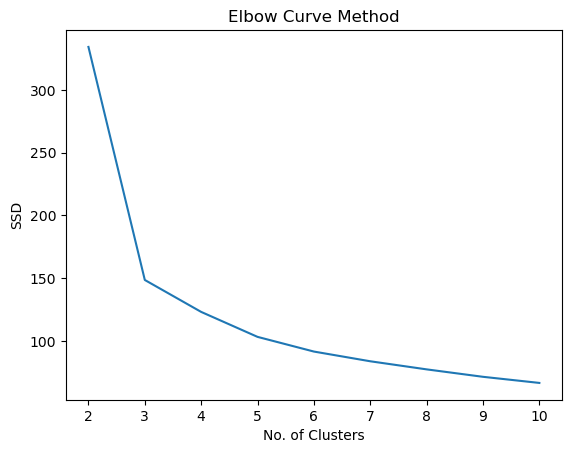


___________Silhouette Analysis___________



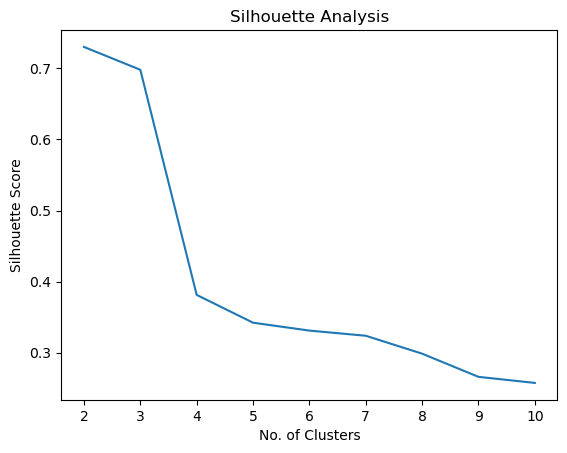


Cluster Labels are:
[0 0 0 ... 0 0 1]

Following are the Cluser groups within the dataset:
0    1194
1     276
2     162
Name: Cluster_Id, dtype: int64


In [182]:
Cluster_kmeans(model_21_Scaled)

In [183]:
# Modelling
kmeans_all = KMeans(n_clusters=3, random_state=50)
kmeans_all.fit(model_21_Scaled)

#Printing Labels
print("\nCluster Labels are:")
print(kmeans_all.labels_)

# assign the label
model_21_Scaled['Cluster_Id'] = kmeans_all.labels_.astype(float)

#Cluster Profiling
print("\nFollowing are the Cluser groups within the dataset:")
print(model_21_Scaled['Cluster_Id'].value_counts())


Cluster Labels are:
[0 0 0 ... 0 0 2]

Following are the Cluser groups within the dataset:
0.0    1194
2.0     276
1.0     162
Name: Cluster_Id, dtype: int64


In [184]:
with open('mod_21.pkl', 'wb') as file:
    pkl.dump(kmeans_all, file)

In [185]:
model_21_Scaled.to_csv('mod_21.csv', index=True)

In [177]:
model_21_Scaled

,ecomomy,disaster,industry,healthcare,poverty,Cluster_Id
city_municipality,,,,,,
Aborlan,0.487762,0.866805,0.664716,0.130123,0.848033,0
Abra De Ilog,0.213842,0.788939,0.704503,0.069142,0.752424,0
Abucay,0.633780,0.966039,0.764806,0.087446,0.960239,0
Abulug,0.546337,0.839781,0.820813,0.110163,0.871488,0
Abuyog,0.550001,0.680452,0.724840,0.182931,0.685460,0
...,...,...,...,...,...,...
Zamboanga,0.571940,0.815125,0.801581,1.000000,0.828770,2
Zamboanguita,0.449923,0.823073,0.760323,0.069990,0.810980,0
Zaragoza,0.622921,0.983178,0.780278,0.066911,0.975729,0


In [178]:
mod_21 = model_21_Scaled.loc[:, model_21_Scaled.columns != 'Cluster_Id']
mod_21, mod_21.to_csv('mod_21.csv', index=True)

(                    ecomomy  disaster  industry  healthcare   poverty
 city_municipality                                                    
 Aborlan            0.487762  0.866805  0.664716    0.130123  0.848033
 Abra De Ilog       0.213842  0.788939  0.704503    0.069142  0.752424
 Abucay             0.633780  0.966039  0.764806    0.087446  0.960239
 Abulug             0.546337  0.839781  0.820813    0.110163  0.871488
 Abuyog             0.550001  0.680452  0.724840    0.182931  0.685460
 ...                     ...       ...       ...         ...       ...
 Zamboanga          0.571940  0.815125  0.801581    1.000000  0.828770
 Zamboanguita       0.449923  0.823073  0.760323    0.069990  0.810980
 Zaragoza           0.622921  0.983178  0.780278    0.066911  0.975729
 Zarraga            0.621404  0.900613  0.743016    0.027638  0.894700
 Zumarraga          0.271765  0.560011  0.597201    0.054921  0.538306
 
 [1632 rows x 5 columns],
 None)

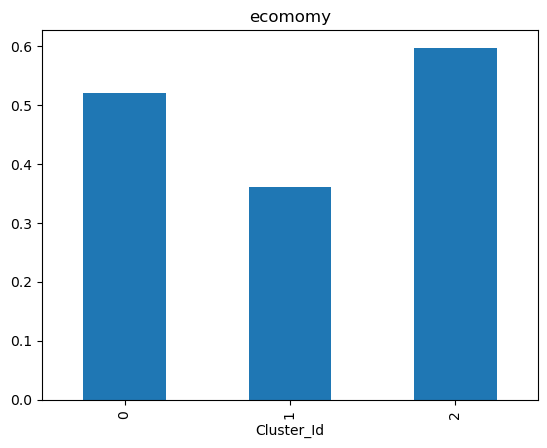

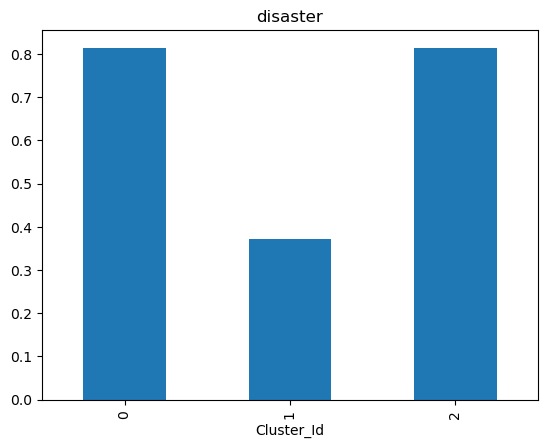

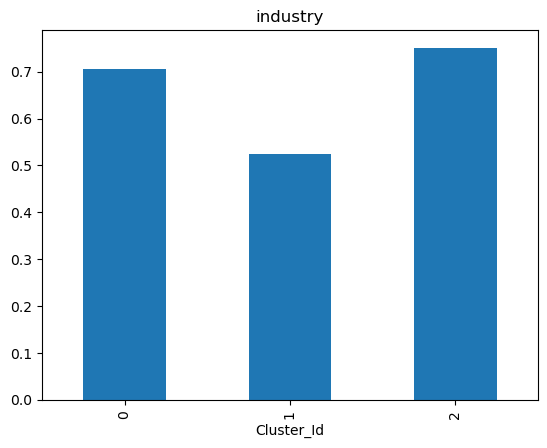

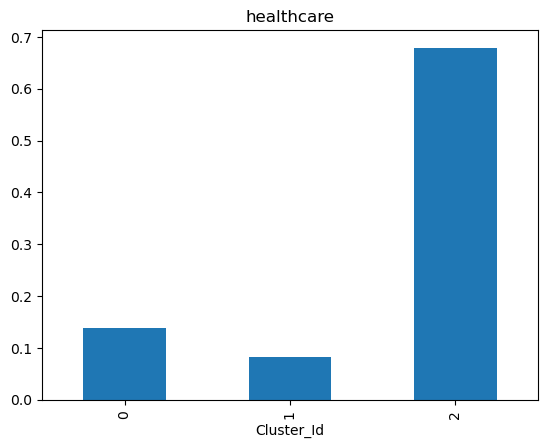

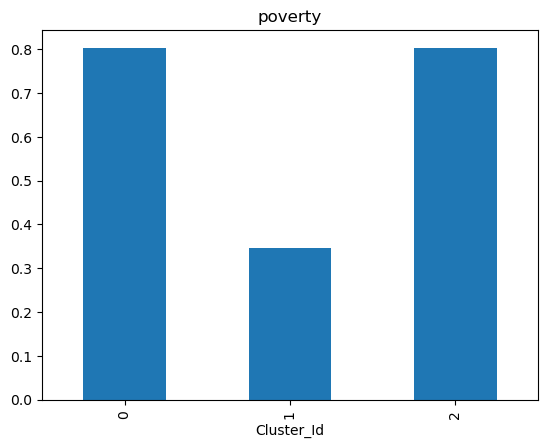

In [179]:
for col in model_21_Scaled.columns.drop('Cluster_Id'):
    model_21_Scaled[col].groupby(model_21_Scaled['Cluster_Id']).mean().plot(kind = 'bar')
    plt.title(col)
    plt.show()

#### Cluster Profile for All Pillars
- 1 - Low Vulnerability 
- 0 - Medium Vulnerability 
- 2 - High Vulnerability 

In [180]:
with open('mod_21.pkl', 'wb') as file:
    pkl.dump(model_21_Scaled, file)

In [137]:
# Modelling
kmeans_all = KMeans(n_clusters=3, random_state=50)
kmeans_all.fit(dti_consolidated_all)

#Printing Labels
print("\nCluster Labels are:")
print(kmeans_all.labels_)

# assign the label
dti_consolidated_all['Cluster_Id'] = kmeans_all.labels_.astype(float)

#Cluster Profiling
print("\nFollowing are the Cluser groups within the dataset:")
print(dti_consolidated_all['Cluster_Id'].value_counts())


Cluster Labels are:
[1 2 1 ... 1 1 2]

Following are the Cluser groups within the dataset:
1.0    1030
2.0     488
0.0     114
Name: Cluster_Id, dtype: int64


In [138]:
with open('mod_km_all.pkl', 'wb') as file:
    pkl.dump(kmeans_all, file)

In [165]:
len(dti_consolidated_all.columns)

52

In [139]:
dti_consolidated_all.dtypes

Local Economy Size                                     float64
Local Economy Growth                                   float64
Active Establishments in the Locality                  float64
Safety Compliant Business                              float64
Employment Generation                                  float64
Cost of Living                                         float64
Cost of Doing Business                                 float64
Financial Deepening                                    float64
Productivity                                           float64
Presence of Business and Professional Organizations    float64
Compliance to National Directives                      float64
Presence of Investment Promotion Unit                  float64
Compliance to ARTA Citizens Charter                    float64
Capacity to Generate Local Resource                    float64
Capacity of Health Services                            float64
Capacity of School Services                            

In [141]:
dti_consolidated_all.isnull().values.any()

False

In [140]:
dti_consolidated_all.to_csv('dti_consolidated_all.csv', index=True)